In [52]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys

### PCA

In [53]:
data = datasets.load_iris()['data']
label = datasets.load_iris()['target']

In [54]:
#sepal length','sepal width','petal length','petal width'
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
#0--->setosa', 1------->'versicolor', '2----->virginica'
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
#Step-1
data_meaned = data - np.mean(data , axis = 0)

In [57]:
np.mean(data_meaned , axis = 0)

array([-1.12502600e-15, -7.60872846e-16, -2.55203266e-15, -4.48530102e-16])

In [60]:
#Step-2
covariance_matrix  = np.cov(data_meaned , rowvar = False)

In [61]:
covariance_matrix

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [64]:
#Step-3
eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)

In [65]:
eigen_values

array([0.02383509, 0.0782095 , 0.24267075, 4.22824171])

In [66]:
eigen_vectors

array([[ 0.31548719,  0.58202985,  0.65658877, -0.36138659],
       [-0.3197231 , -0.59791083,  0.73016143,  0.08452251],
       [-0.47983899, -0.07623608, -0.17337266, -0.85667061],
       [ 0.75365743, -0.54583143, -0.07548102, -0.3582892 ]])

In [67]:
#Step-4
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [68]:
sorted_index

array([3, 2, 1, 0])

In [69]:
sorted_eigenvalue

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [70]:
sorted_eigenvectors

array([[-0.36138659,  0.65658877,  0.58202985,  0.31548719],
       [ 0.08452251,  0.73016143, -0.59791083, -0.3197231 ],
       [-0.85667061, -0.17337266, -0.07623608, -0.47983899],
       [-0.3582892 , -0.07548102, -0.54583143,  0.75365743]])

In [72]:
#Step-5
n_components = 2
p_components_req = sorted_eigenvectors[:,0:n_components]

In [73]:
#Explained Variance
sum(sorted_eigenvalue[:n_components])/sum(sorted_eigenvalue)

0.9776852063187947

In [74]:
p_components_req

array([[-0.36138659,  0.65658877],
       [ 0.08452251,  0.73016143],
       [-0.85667061, -0.17337266],
       [-0.3582892 , -0.07548102]])

In [75]:
#Step-6
projected_data = np.dot(p_components_req.transpose() , data_meaned.transpose() ).transpose()

In [76]:
projected_data

array([[ 2.68412563,  0.31939725],
       [ 2.71414169, -0.17700123],
       [ 2.88899057, -0.14494943],
       [ 2.74534286, -0.31829898],
       [ 2.72871654,  0.32675451],
       [ 2.28085963,  0.74133045],
       [ 2.82053775, -0.08946138],
       [ 2.62614497,  0.16338496],
       [ 2.88638273, -0.57831175],
       [ 2.6727558 , -0.11377425],
       [ 2.50694709,  0.6450689 ],
       [ 2.61275523,  0.01472994],
       [ 2.78610927, -0.235112  ],
       [ 3.22380374, -0.51139459],
       [ 2.64475039,  1.17876464],
       [ 2.38603903,  1.33806233],
       [ 2.62352788,  0.81067951],
       [ 2.64829671,  0.31184914],
       [ 2.19982032,  0.87283904],
       [ 2.5879864 ,  0.51356031],
       [ 2.31025622,  0.39134594],
       [ 2.54370523,  0.43299606],
       [ 3.21593942,  0.13346807],
       [ 2.30273318,  0.09870885],
       [ 2.35575405, -0.03728186],
       [ 2.50666891, -0.14601688],
       [ 2.46882007,  0.13095149],
       [ 2.56231991,  0.36771886],
       [ 2.63953472,

In [77]:
#Downstreamed dataset
final_df = pd.DataFrame(projected_data, columns = ['Component1','Component2'])
final_df = pd.concat([final_df , pd.DataFrame(label , columns = ['label'])] , axis = 1)
final_df

,Component1,Component2,label
0,2.684126,0.319397,0
1,2.714142,-0.177001,0
2,2.888991,-0.144949,0
3,2.745343,-0.318299,0
4,2.728717,0.326755,0
...,...,...,...
145,-1.944110,0.187532,2
146,-1.527167,-0.375317,2
147,-1.764346,0.078859,2
148,-1.900942,0.116628,2


<AxesSubplot:xlabel='Component1', ylabel='Component2'>

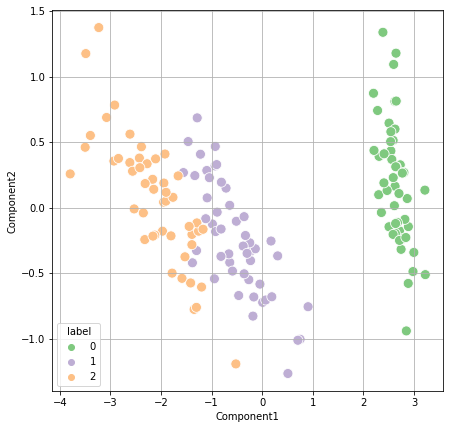

In [78]:
#Visualizzation
plt.figure(figsize = (7,7))
plt.grid()
sb.scatterplot(data = final_df , x = 'Component1',y = 'Component2' , hue = 'label' , s = 100 , palette= 'Accent')


### Kernel PCA

In [79]:
from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform

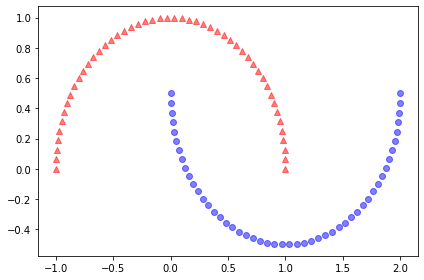

In [80]:
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],color='blue', marker='o', alpha=0.5)
plt.tight_layout()

In [82]:
X

array([[ 8.71318704e-01,  4.90717552e-01],
       [ 7.15472413e-01, -4.58667853e-01],
       [ 1.46253829e+00, -3.86599306e-01],
       [-2.22520934e-01,  9.74927912e-01],
       [ 3.27699110e-01, -2.40277997e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 9.49055747e-01,  3.15108218e-01],
       [ 0.00000000e+00,  5.00000000e-01],
       [ 1.40478334e+00, -4.14412623e-01],
       [ 9.67294863e-01,  2.53654584e-01],
       [ 9.60230259e-02,  9.95379113e-01],
       [ 4.27883340e-01, -3.20172255e-01],
       [ 1.09602303e+00, -4.95379113e-01],
       [ 1.98586378e-01, -9.81105305e-02],
       [ 3.20515776e-02,  9.99486216e-01],
       [-9.00968868e-01,  4.33883739e-01],
       [ 1.15959990e+00, -4.87181783e-01],
       [-7.61445958e-01,  6.48228395e-01],
       [ 7.30832427e-02,  1.24732995e-01],
       [ 1.03205158e+00, -4.99486216e-01],
       [-6.23489802e-01,  7.81831482e-01],
       [ 1.76144596e+00, -1.48228395e-01],
       [ 3.45365054e-01,  9.38468422e-01],
       [-2.

<AxesSubplot:xlabel='Component1', ylabel='Component2'>

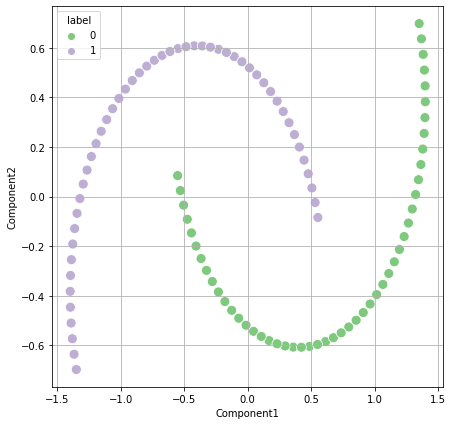

In [81]:
#Normal PCA on this dataset
#Step 1
X_meaned = X - np.mean(X , axis = 0)
#Step 2
covariance_matrix  = np.cov(X_meaned, rowvar = False)
#Step 3
eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)
#Step-4
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
#Step-5
n_components = 2
p_components_req = sorted_eigenvectors[:,0:n_components]
#Step-6
projected_data = np.dot(p_components_req.transpose() ,X_meaned.transpose() ).transpose()
#Downstreamed dataset
final_df = pd.DataFrame(projected_data, columns = ['Component1','Component2'])
final_df = pd.concat([final_df , pd.DataFrame(y, columns = ['label'])] , axis = 1)
#Visualizzation
plt.figure(figsize = (7,7))
plt.grid()
sb.scatterplot(data = final_df , x = 'Component1',y = 'Component2' , hue = 'label' , s = 100 , palette= 'Accent')


In [26]:
euclidean_distance = pdist(X, 'sqeuclidean')#computes pairwise euclidean distance betwwen the vectors
distance_matrix= squareform(euclidean_distance)
distance_matrix


array([[0.        , 0.92562071, 1.11922547, ..., 0.32382379, 1.24046572,
        0.86735455],
       [0.92562071, 0.        , 0.5633013 , ..., 1.8737194 , 1.68080021,
        0.06541027],
       [1.11922547, 0.5633013 , 0.        , ..., 2.62103471, 0.39717276,
        0.96321486],
       ...,
       [0.32382379, 1.8737194 , 2.62103471, ..., 0.        , 2.74227495,
        1.542287  ],
       [1.24046572, 1.68080021, 0.39717276, ..., 2.74227495, 0.        ,
        2.19204605],
       [0.86735455, 0.06541027, 0.96321486, ..., 1.542287  , 2.19204605,
        0.        ]])

In [27]:
#Kernel Matrix K
gamma = 15
K = np.exp(-gamma * distance_matrix)  
K

array([[1.00000000e+00, 9.33513227e-07, 5.11562054e-08, ...,
        7.77099665e-03, 8.30020401e-09, 2.23712673e-06],
       [9.33513227e-07, 1.00000000e+00, 2.14003220e-04, ...,
        6.22028171e-13, 1.12348209e-11, 3.74878199e-01],
       [5.11562054e-08, 2.14003220e-04, 1.00000000e+00, ...,
        8.42337906e-18, 2.58613358e-03, 5.31149160e-07],
       ...,
       [7.77099665e-03, 6.22028171e-13, 8.42337906e-18, ...,
        1.00000000e+00, 1.36671131e-18, 8.97220116e-11],
       [8.30020401e-09, 1.12348209e-11, 2.58613358e-03, ...,
        1.36671131e-18, 1.00000000e+00, 5.24925214e-15],
       [2.23712673e-06, 3.74878199e-01, 5.31149160e-07, ...,
        8.97220116e-11, 5.24925214e-15, 1.00000000e+00]])

In [83]:
#Centering the kernel matrix
N = K.shape[0] # number of samples
ones = np.ones((N,N)) / N
K = K - ones @ K - K @ ones + ones @ K @ ones

In [84]:
#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])

In [88]:
eigenvecs

array([[ 0.07455287, -0.12640964,  0.12970363, ...,  0.0257255 ,
         0.        ,  0.10006582],
       [-0.13184362, -0.07057103, -0.07045489, ..., -0.00290735,
         0.2254944 ,  0.10073691],
       [-0.12522054,  0.10492692,  0.10371965, ..., -0.00230537,
         0.17952065,  0.10069615],
       ...,
       [ 0.12300381, -0.10627606,  0.10750402, ..., -0.18004078,
        -0.00263588,  0.09964048],
       [-0.07190802,  0.12204704,  0.11879925, ..., -0.00033283,
         0.01630805,  0.10008998],
       [-0.11916726, -0.1154592 , -0.11712043, ..., -0.00216484,
         0.16112796,  0.10045108]])

In [89]:
#Normalization
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)

In [91]:
#Project the data onto top 2 eigenvectors
projected_data = np.dot(K , principal_components )

In [92]:
projected_data

array([[ 0.01981301, -0.0328935 ],
       [-0.03503848, -0.01836354],
       [-0.03327834,  0.02730341],
       [ 0.03586183,  0.01378748],
       [-0.02794711, -0.03464612],
       [ 0.00323127, -0.00999266],
       [ 0.01402958, -0.02639335],
       [-0.00323127, -0.00999266],
       [-0.03410793,  0.02438449],
       [ 0.01199757, -0.02346027],
       [ 0.0362846 , -0.00678576],
       [-0.03053679, -0.03202267],
       [-0.03640719,  0.00570814],
       [-0.02332378, -0.0350275 ],
       [ 0.0364507 , -0.00264904],
       [ 0.01911012,  0.0317583 ],
       [-0.03619725,  0.00981191],
       [ 0.02593032,  0.03578969],
       [-0.01601655, -0.02896758],
       [-0.03649162,  0.00153489],
       [ 0.03008931,  0.03364023],
       [-0.02593032,  0.03578969],
       [ 0.03437606, -0.0217753 ],
       [ 0.03540124,  0.01757744],
       [ 0.03410793,  0.02438449],
       [-0.0209345 ,  0.03348399],
       [-0.03008931,  0.03364023],
       [ 0.0216073 , -0.03419385],
       [-0.00993299,

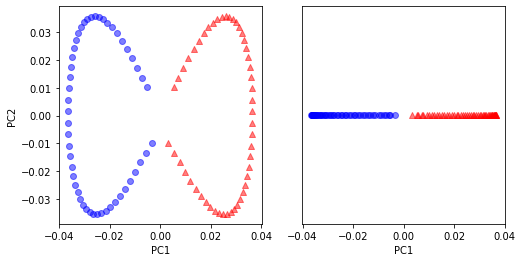

In [93]:
#Visualiation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(projected_data[y==0, 0], np.zeros((50,1)), color='red', marker='^', alpha=0.5)
ax[1].scatter(projected_data[y==1, 0], np.zeros((50,1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

### K-Means Clustering

In [33]:
from sklearn.datasets import make_blobs
n_clusters = 5
X, y = make_blobs(n_samples=100, n_features = 2 ,centers= n_clusters, random_state=240)
#Samples and featurees
n_samples = X.shape[0]
n_features = X.shape[1]


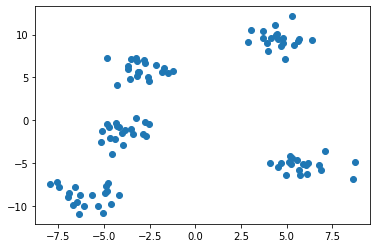

In [34]:
#Dataset visualization
plt.scatter(X[:, 0], X[:, 1]);

In [35]:
def centroid_initialization(X , n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    #initial assignment (random)
    for i in range(n_clusters):
        centroid_current_cluster = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid_current_cluster

    return centroids

In [36]:
centroids = centroid_initialization(X, n_clusters)
centroids

array([[ 5.73655153, -6.42990242],
       [-4.32846108, -0.27088264],
       [-3.50009676,  7.11063745],
       [-3.96560134, -2.86025628],
       [ 6.91469029, -5.80115157]])

In [37]:
def cluster_assignment(X, centroids , n_clusters):
    current_clusters = [[] for i in range(n_clusters)]

    for index, data_point in enumerate(X):
        nearest_centroid = np.argmin(
            np.sqrt(np.sum((data_point - centroids) ** 2, axis=1))
        )
        current_clusters[nearest_centroid].append(index)

    return current_clusters

In [38]:
current_clusters = cluster_assignment(X , centroids, n_clusters)
current_clusters

[[7, 18, 22, 23, 33, 46, 48, 51, 59, 77, 83],
 [9, 17, 37, 47, 49, 50, 58, 60, 67, 78, 88, 94],
 [0,
  3,
  4,
  5,
  11,
  14,
  21,
  26,
  30,
  31,
  32,
  34,
  35,
  36,
  38,
  39,
  41,
  44,
  45,
  52,
  56,
  57,
  61,
  73,
  74,
  75,
  76,
  80,
  81,
  82,
  84,
  85,
  86,
  89,
  90,
  91,
  93,
  96,
  97,
  98],
 [2,
  10,
  12,
  13,
  15,
  19,
  25,
  27,
  28,
  29,
  40,
  43,
  53,
  54,
  55,
  62,
  63,
  64,
  65,
  66,
  69,
  70,
  72,
  79,
  87,
  92,
  95,
  99],
 [1, 6, 8, 16, 20, 24, 42, 68, 71]]

In [39]:
def update_centroids(X, current_clusters, n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    for index, cluster in enumerate(current_clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[index] = new_centroid

    return centroids

In [40]:
update_centroids(X , current_clusters, n_clusters)

array([[ 5.16046007, -5.34515514],
       [-3.95197529, -0.68174893],
       [ 0.81161833,  7.73802732],
       [-5.4094021 , -6.96410595],
       [ 6.87314329, -5.12795065]])

In [41]:
n_iter = 1000
centroids = centroid_initialization(X, n_clusters)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    print(diff)
    if not diff.any():
        print("K-Means Converged")
        break

[[-0.87858385  0.78969092]
 [-0.18839163  1.07590482]
 [-0.76111326 -0.40724163]
 [ 1.04260017 -0.83141162]
 [-2.11903248 -3.43569499]]
[[ 0.          0.        ]
 [ 0.          0.        ]
 [-0.03307672 -0.52390066]
 [ 0.11868767  0.07467376]
 [-0.04414346 -0.13615635]]
[[ 0.          0.        ]
 [ 0.          0.        ]
 [-0.13066616 -0.56195266]
 [ 0.19590317  0.31413199]
 [-0.05941772 -0.13248184]]
[[ 0.          0.        ]
 [ 0.          0.        ]
 [-0.02677869 -0.49719978]
 [ 0.1423206  -0.03806819]
 [-0.0682764  -0.13182296]]
[[ 0.          0.        ]
 [ 0.          0.        ]
 [-0.30032139 -1.06752354]
 [ 0.16944102 -0.2573952 ]
 [-0.03232601 -0.29324438]]
[[ 0.          0.        ]
 [ 0.          0.        ]
 [-0.73750708 -2.91549625]
 [ 0.27778853 -0.40418734]
 [-0.26235321 -0.9891711 ]]
[[ 0.          0.        ]
 [ 0.          0.        ]
 [-0.2344324  -1.33553466]
 [-0.05471025 -0.17475766]
 [-0.47997723 -1.82282947]]
[[ 0.          0.        ]
 [ 0.          0.    

In [42]:
#Assigning clusters_ids to all data points
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id

In [43]:
y_pred

array([0., 1., 2., 3., 0., 3., 1., 1., 1., 2., 4., 0., 4., 2., 0., 4., 1.,
       2., 1., 4., 1., 3., 1., 1., 1., 4., 3., 2., 2., 4., 3., 3., 3., 1.,
       0., 3., 3., 2., 0., 3., 2., 3., 1., 4., 0., 0., 1., 2., 1., 2., 2.,
       1., 3., 4., 2., 4., 0., 3., 2., 1., 2., 0., 4., 4., 4., 2., 4., 2.,
       1., 4., 4., 1., 4., 3., 3., 0., 3., 1., 2., 4., 0., 0., 3., 1., 0.,
       0., 3., 2., 2., 0., 3., 0., 4., 0., 2., 4., 0., 0., 3., 4.])

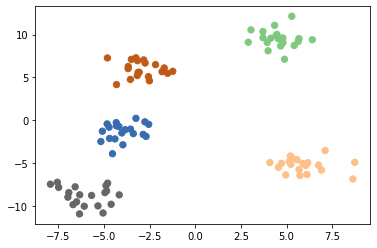

In [44]:
#Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap= 'Accent')

### K-Means++

In [45]:
def plot( centroids):
    plt.scatter(X[:, 0], X[:, 1], color = 'green', label = 'data')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],color = 'black', label = 'previous centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color = 'red', label = 'next one centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))
     
    #plt.legend()
#     plt.xlim(-5, 12)
#     plt.ylim(-10, 15)
    plt.show()

In [46]:
def distance(p1, p2):
    return np.sum((p1 - p2)**2)

In [47]:
def initialize_kmeans_plus(X, k):
    centroids = []
    centroids.append(X[np.random.choice(range(n_samples))])
    plot(np.array(centroids))
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## List to store distances of data from the nearest mean
        dist = []
        for i in range(X.shape[0]):
            point = X[i, :]
            d = sys.maxsize
             
            #finding closest centroid for 'point' from so far selected centroids 
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        # select a data point as next centroid with probability proportional to above distance
        dist = np.array(dist)
        p = dist / np.sum(dist)
        index = np.random.choice(range(n_samples), p = p)
        next_centroid = X[index, :]
        #next_centroid = X[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot( np.array(centroids))
    return centroids
  



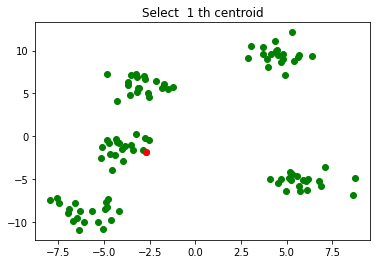

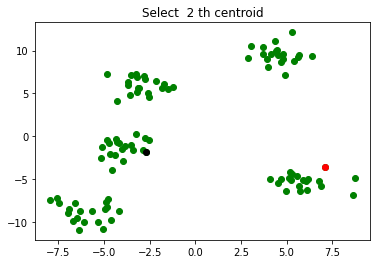

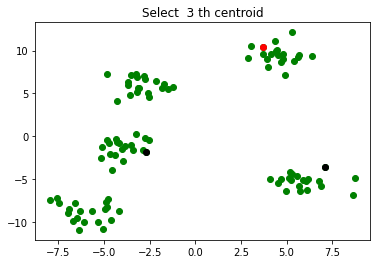

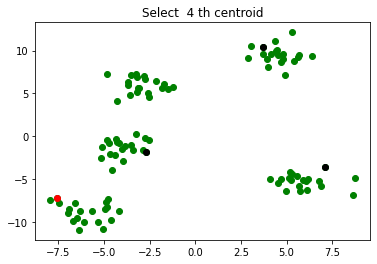

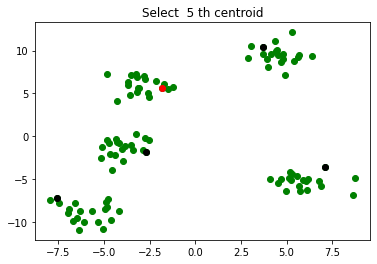

In [48]:
centroids = initialize_kmeans_plus(X, k = 5)

In [49]:
n_iter = 1000
#centroids = initialize_kmeans_plus(X, k = 5)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    print(diff)
    if not diff.any():
        print("K-Means Converged")
        break

[[-1.26281758  0.540632  ]
 [-1.184003   -1.71689855]
 [ 0.83586681 -0.84412263]
 [ 1.56972471 -1.58699075]
 [-1.10062606  0.28729011]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
K-Means Converged


In [50]:
#Assigning clusters_ids to all data points
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id

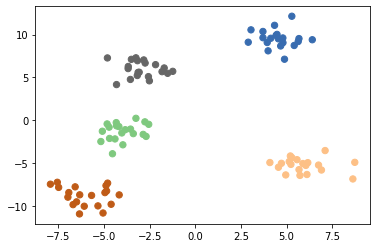

In [51]:
#Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap= 'Accent')